<a href="https://colab.research.google.com/github/misshp11/CV2/blob/main/lab2_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras import utils
 

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

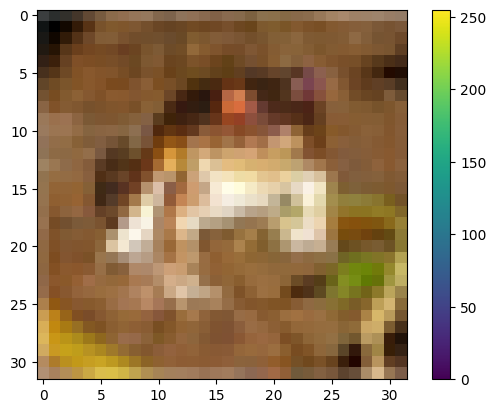

In [5]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [6]:
x_train = x_train/ 255
x_test = x_test/ 255

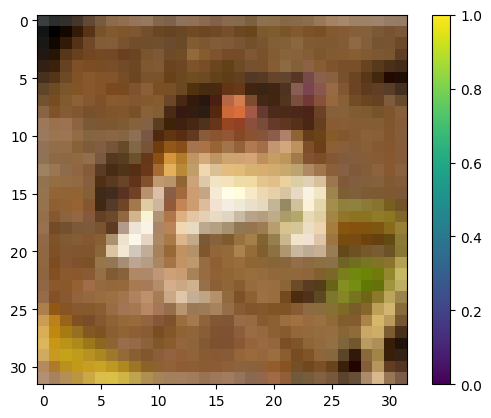

In [8]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

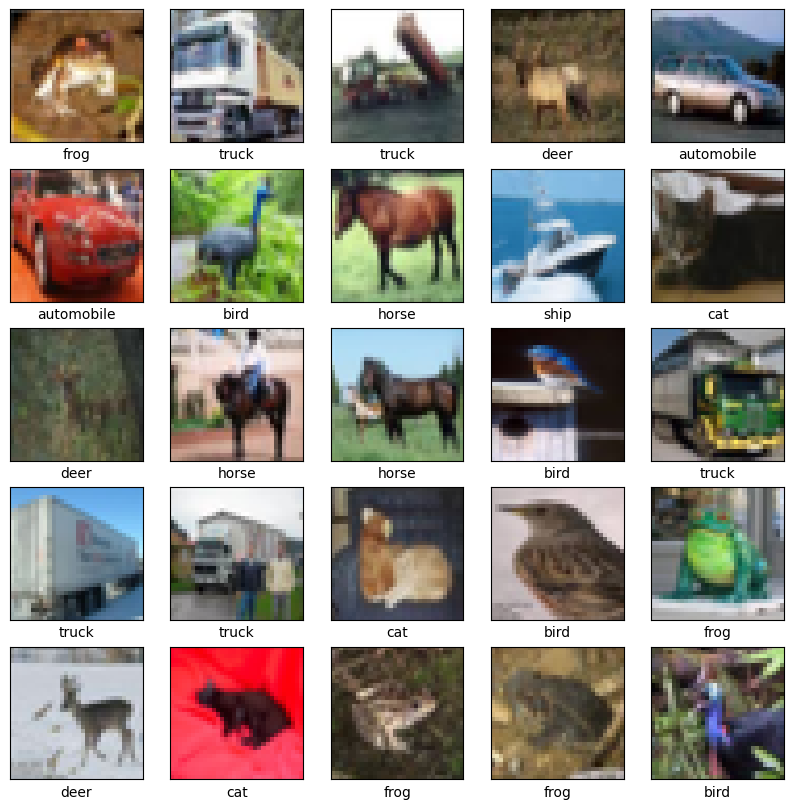

In [9]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[y_train[i][0]])

In [15]:
model = keras.Sequential([
                          keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Conv2D(64, 3, activation="relu"),
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Conv2D(128, 3, activation="relu"),
                          keras.layers.Flatten(),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.002), loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 2048)             

все работает просто ты уменьшила эпохи и завтра на ефимове запихни это на гитхаб

In [18]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 89s 56ms/step - loss: 1.5112 - accuracy: 0.4497
Epoch 2/15
1563/1563 [==============================] - 93s 60ms/step - loss: 1.1336 - accuracy: 0.6004
Epoch 3/15
1563/1563 [==============================] - 88s 56ms/step - loss: 0.9398 - accuracy: 0.6722
Epoch 4/15
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8116 - accuracy: 0.7170
Epoch 5/15
1563/1563 [==============================] - 84s 53ms/step - loss: 0.7114 - accuracy: 0.7517
Epoch 6/15
1563/1563 [==============================] - 86s 55ms/step - loss: 0.6223 - accuracy: 0.7804
Epoch 7/15
1563/1563 [==============================] - 86s 55ms/step - loss: 0.5453 - accuracy: 0.8095
Epoch 8/15
1563/1563 [==============================] - 83s 53ms/step - loss: 0.4629 - accuracy: 0.8392
Epoch 9/15
1563/1563 [==============================] - 84s 54ms/step - loss: 0.3881 - accuracy: 0.8640
Epoch 10/15
1563/1563 [==============================] - 85s 54m

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 6s 19ms/step - loss: 1.3662 - accuracy: 0.7344
Test loss: 1.3662052154541016
Test accuracy: 0.7343999743461609


In [24]:
predictions = model.predict(x_train)

1563/1563 [==============================] - 40s 25ms/step


In [25]:
predictions[0]

array([3.3370669e-15, 5.8842856e-13, 6.3665017e-02, 8.4853295e-04,
       1.3906802e-07, 2.3127776e-02, 9.1233462e-01, 2.3902048e-05,
       7.7791211e-12, 6.5396441e-15], dtype=float32)

In [27]:
class_names[np.argmax(predictions[0])]

'frog'

Text(0.5, 0, 'frog')

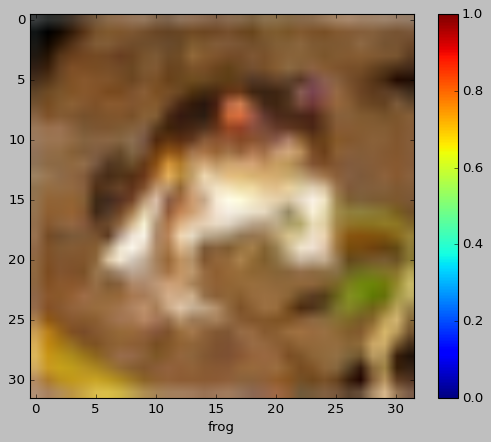

In [105]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_train[0][0]])